In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import poison

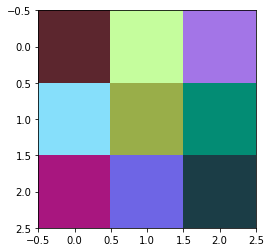

In [53]:
trig_1 = poison.ImageTrigger('random', size=(3,3), rgb=True)
trig_1.show()


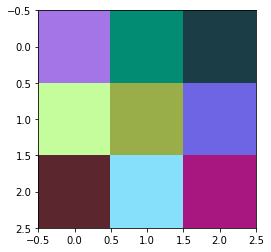

In [54]:
trig_2 = poison.RotateImageTransform().do(trig_1, rotations=1)
trig_2.show()


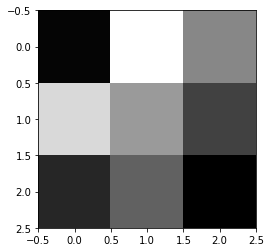

In [55]:
trig_3 = poison.GrayScaleImageTransform().do(trig_1)
trig_3.show(cmap='gray')

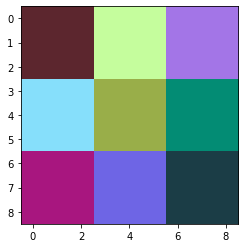

In [56]:
trig_4 = poison.UpScaleImageTransform().do(trig_1, scale_factor=3)
trig_4.show()

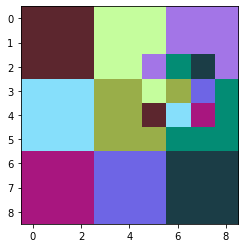

In [57]:
trig_5 = poison.ImageMerge().do(trig_4, trig_2)
trig_5.show()
trig_4.show()

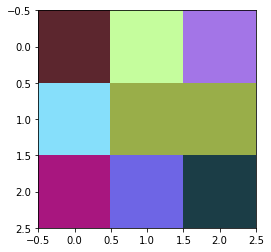

In [58]:
trig_6 = poison.DownScaleImageTransform().do(trig_4, scale_factor=3)
trig_6.show()

In [59]:
text = 'Hello my name is not John lmfao.    '
text_1 = poison.BasicTextEntity(text, label=1)
print(text_1)
print(text_1.get_data())

Hello my name is not John lmfao.    
['Hello' 'my' 'name' 'is' 'not' 'John' 'lmfao.']


In [60]:
text_2 = poison.LowerCaseTextTransform().do(text_1)
print(text_2)
print(text_2.get_data())

hello my name is not john lmfao.    
['hello' 'my' 'name' 'is' 'not' 'john' 'lmfao.']
